# Goal of this Notebook

Running visualizations of our predicted price model to gain insight. 

In [2]:
#Loading libraries
library(ggplot2)
library(plotly)
library(RColorBrewer)
library(dplyr)
library(maps)
library(ggmap)
library(mapproj)

In [3]:
# Reading in the grouped complete metrics dataset
df = read.csv('/dsa/groups/casestudy2022su/team05/prediction_data.csv')

In [4]:
# Looking at the largest difference in predicted price.
# This shows there were some mistakes in our Cars.com data when the listing was created. The listed price was set at $1
# on the largest price differences. There are some possible duplicates. Its possible some vehicles may have a salvaged title.

df2 <- df %>% filter(Price < 150000)
df2 %>% arrange(Diff) %>% select(Make, Model, Year, Price, Predicted_price, Diff, Avg_Price, Min_Price, 
                                      Max_Price, Mileage, Avg_Mileage, Min_Mileage, Max_Mileage,YoY_price_pct_change, 
                                      YoY_mileage_pct_change, Count) %>% head(n=50)


Make,Model,Year,Price,Predicted_price,Diff,Avg_Price,Min_Price,Max_Price,Mileage,Avg_Mileage,Min_Mileage,Max_Mileage,YoY_price_pct_change,YoY_mileage_pct_change,Count
<fct>,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>
GMC,Sierra 2500 SLT,2018,1,60317.9,-60316.9,56931.31,1,68050,26011,67150.310,24592,129221,-9,15,29
Chevrolet,Tahoe Z71,2021,1,57313.9,-57312.9,74651.73,1,84775,7684,18100.060,717,69968,-5,215,167
Chevrolet,Tahoe Premier,2018,1,48316.7,-48315.7,49827.00,1,67997,49966,66169.421,1766,152392,-17,46,126
RAM,1500 Big Horn,2021,1,45104.6,-45103.6,45802.03,1,74990,18063,17665.369,6,77235,-6,163,309
Hyundai,Palisade SEL,2022,1,43906.4,-43905.4,44966.00,1,54500,12417,7312.800,845,14262,0,0,20
RAM,1500 Big Horn,2020,1,43179.3,-43178.3,42330.41,1,56995,11912,30903.987,2501,115134,-7,74,560
RAM,2500 Laramie,2022,1,43135.2,-43134.2,76460.18,1,109991,8336,6411.600,695,21630,0,0,45
GMC,Sierra 1500 SLT,2018,1,42910.3,-42909.3,41989.54,1,58401,35373,62052.876,5258,173520,-13,26,354
Ford,F-250 Super Duty,2016,1,41066.0,-41065.0,37840.18,1,58800,62193,77458.091,22144,117504,-30,0,11


In [5]:
# Reducing the data set to look at a more expected price difference. Less than 10k. Should reduce anamolies in listings.
Diff_Subset <- df2 %>% filter(Diff > -10000 & Diff < 0) 

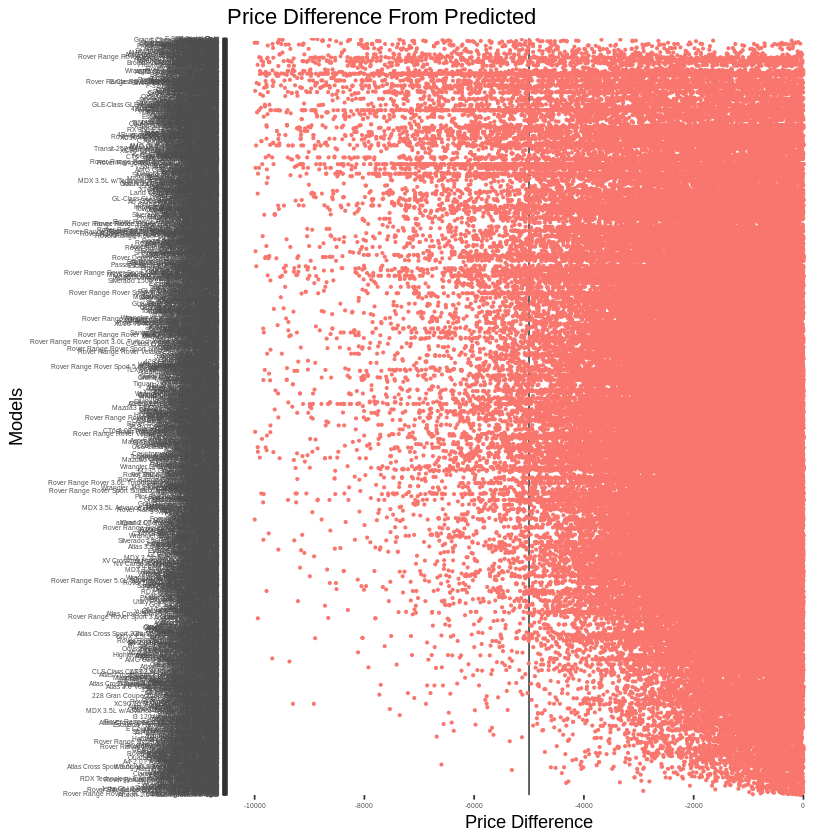

In [7]:
# Wanting to visualize all models with a price difference greater than 0 from predicted. Looking for deals.
# There are to many models to display properly.

# Loading in data and aes
newp <- ggplot(data = Diff_Subset,
             mapping = aes(x = Diff,
                           y = reorder(Model, -Diff),
                          color = 'blue'))

#Making a vertical line to represent -5k or the midpoint of the data
newp1 <- newp + geom_vline(xintercept = -5000, color = "gray30") +
    geom_point(size = .5)

#Making pricing breaks
newp2 <- newp1 + scale_x_continuous(breaks = c(-10000,-8000,-6000,-4000,-2000,0,2000),
                              labels = c('-10000','-8000','-6000','-4000','-2000','0','2000'))
#Labels & aesthetics
newp2 + 
    guides(color=FALSE) + labs(x = "Price Difference", y = "Models") +
    theme(axis.text=element_text(size=4))+   labs(title = "Price Difference From Predicted") 

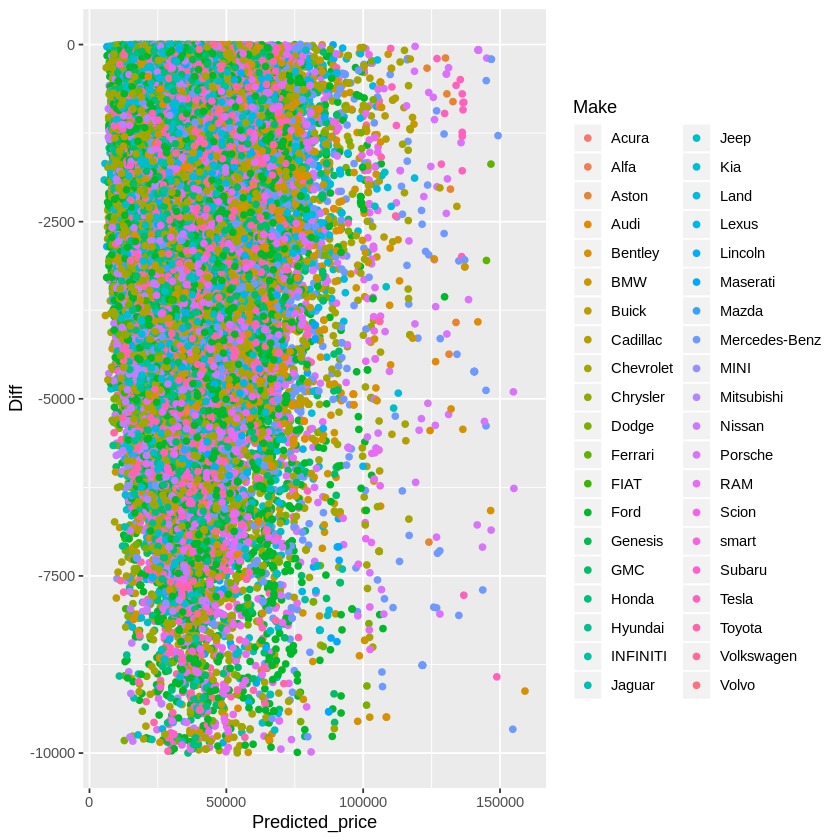

In [8]:
# Can Make tell us any more? Nothing jumps out as pattern
p <- ggplot(data = Diff_Subset,
            mapping = aes(x = Predicted_price, y = Diff))
p + geom_point(mapping = aes(color = Make)) 

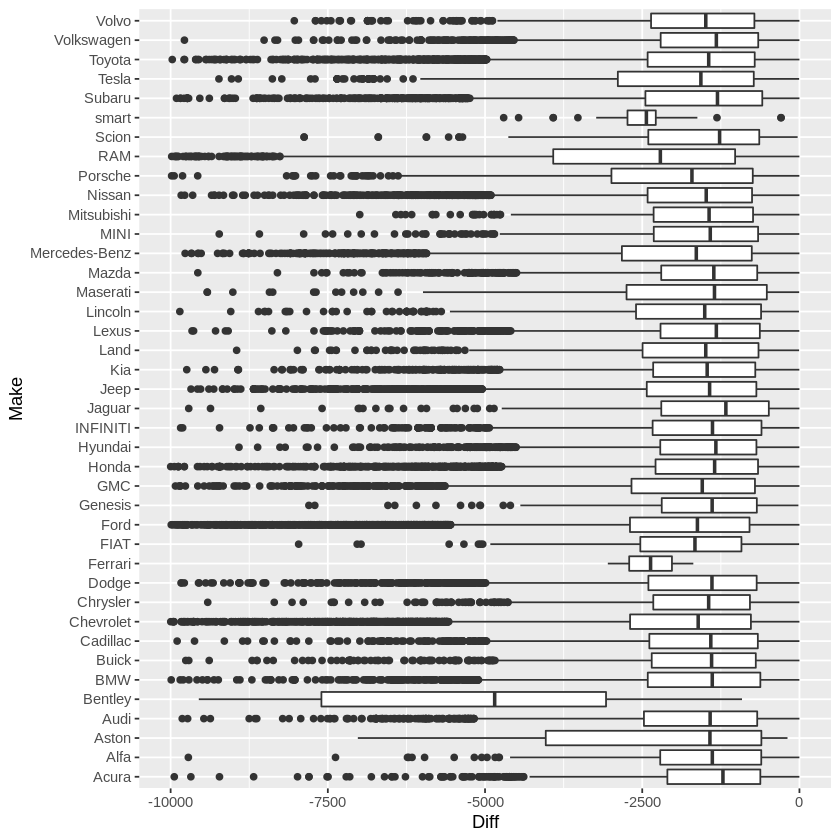

In [9]:
# Box plot by Make in price difference. Ram is a good example of larger than expected price diff on average.
p <- ggplot(data = Diff_Subset,
            mapping = aes(x = Make, y = Diff))
p + geom_boxplot() + coord_flip()

In [10]:
# Making subsets of data by Make. A category for domestic, foreign, domestic luxury, and foreign luxury brands.

domestic <- df2 %>% filter(Make == 'Chevrolet' | Make == 'Chrysler' | Make == 'Dodge' | Make == 'Ford'|
                           Make == 'GMC'| Make == 'Jeep'| Make == 'RAM')

domestic_lux <- df2 %>% filter(Make == 'Cadillac'| Make == 'Buick'| Make == 'Lincoln'| Make == 'Tesla')

foreign <- df2 %>% filter(Make == 'Honda'| Make == 'Kia'|Make == 'MINI'| Make == 'Nissan'| Make == 'Mazda'|
                           Make == 'Subaru'| Make == 'Toyota'| Make == 'Volkswagen')

foreign_lux <- df2 %>% filter(Make == 'Acura'| Make == 'Audi'| Make == 'BMW'|
                              Make == 'INFINITI'|Make == 'Lexus'|Make == 'Mercedes-Benz'|Make == 'Porsche')

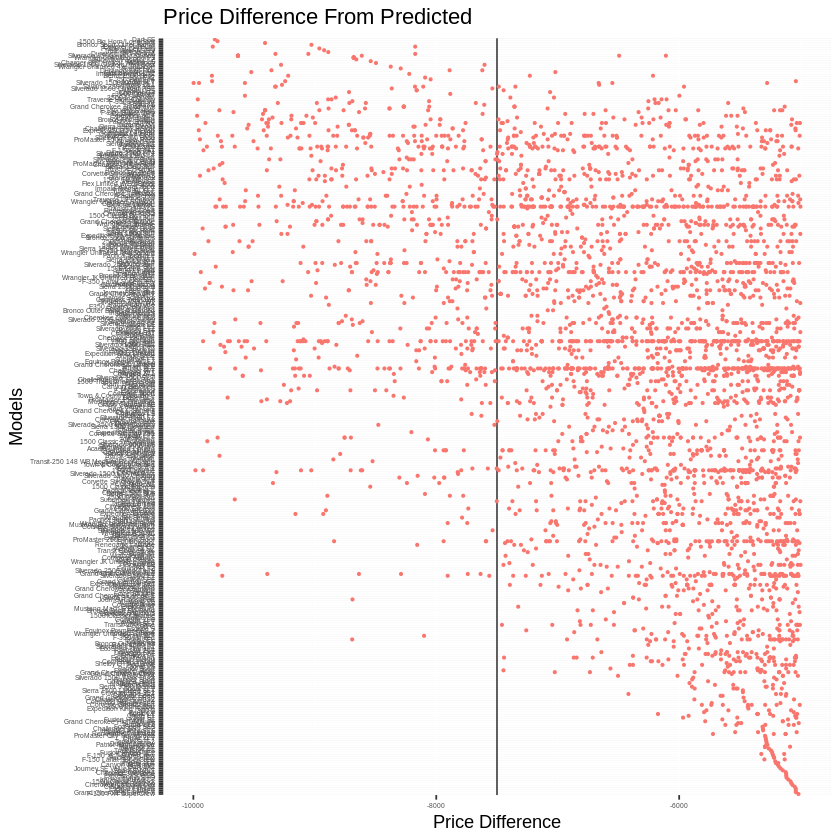

In [14]:
# Same geom_point plot as above just looking at domestic brands and in between -5 & -10 price discount

newp <- ggplot(data = subset(domestic, Diff < -5000 & Diff > -10000),
             mapping = aes(x = Diff,
                           y = reorder(Model, -Diff),
                          color = 'blue'))

#Making a vertical line to represent -7.5k or the midpoint of the data
newp1 <- newp + geom_vline(xintercept = -7500, color = "gray30") +
    geom_point(size = .5)

#Making pricing breaks
newp2 <- newp1 + scale_x_continuous(breaks = c(-10000,-8000,-6000,-4000),
                              labels = c('-10000','-8000','-6000','-4000'))
#Labels & aesthetics
newp2 + 
    guides(color=FALSE) + labs(x = "Price Difference", y = "Models") +
    theme(axis.text=element_text(size=4))+   labs(title = "Price Difference From Predicted") 

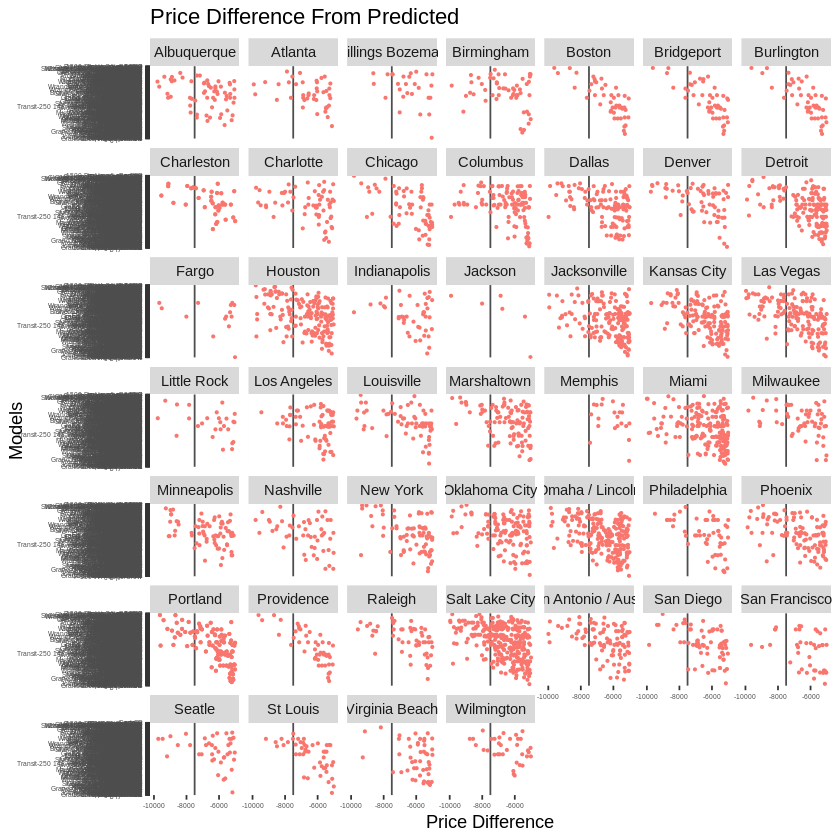

In [15]:
# Looking at discounts by cities.
newp <- ggplot(data = subset(domestic, Diff < -5000 & Diff > -10000),
             mapping = aes(x = Diff,
                           y = reorder(Model, -Diff),
                          color = 'blue'))

#Making a vertical line to represent -7.5k or the midpoint of the data
newp1 <- newp + geom_vline(xintercept = -7500, color = "gray30") +
    geom_point(size = .5)

#Making pricing breaks
newp2 <- newp1 + scale_x_continuous(breaks = c(-10000,-8000,-6000,-4000),
                              labels = c('-10000','-8000','-6000','-4000'))
#Labels & aesthetics
newp2 + 
    guides(color=FALSE) + labs(x = "Price Difference", y = "Models") +
    theme(axis.text=element_text(size=4))+   labs(title = "Price Difference From Predicted")  + facet_wrap(~City)

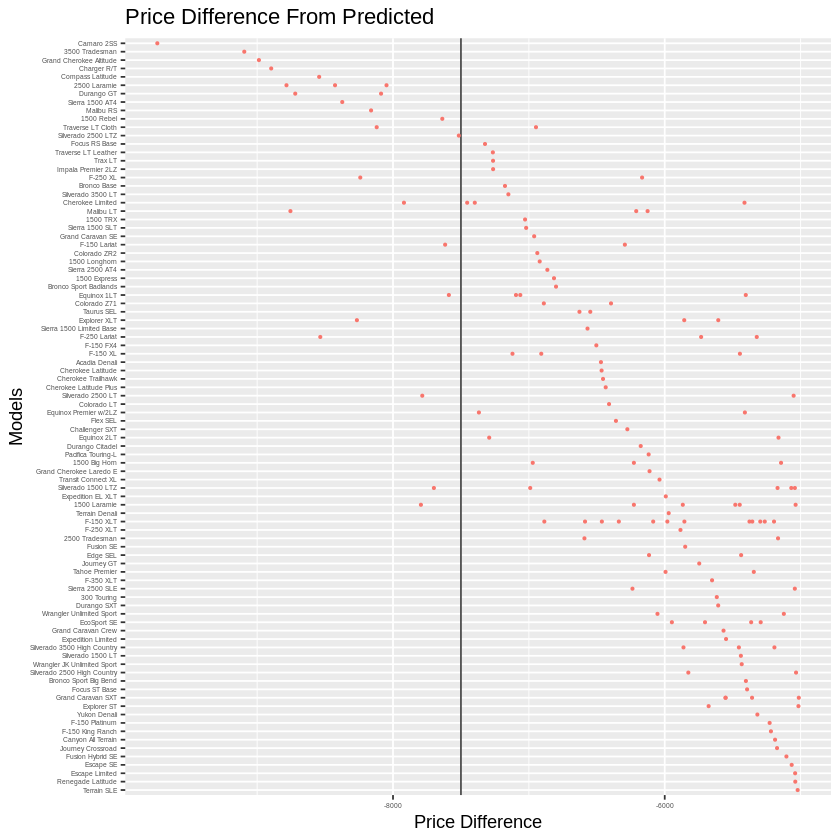

In [16]:
# Breaking out just Kansas City

newp <- ggplot(data = subset(domestic, Diff < -5000 & Diff > -10000 & City == 'Kansas City'),
             mapping = aes(x = Diff,
                           y = reorder(Model, -Diff),
                          color = 'blue'))

#Making a vertical line to represent -7.5k or the midpoint of the data
newp1 <- newp + geom_vline(xintercept = -7500, color = "gray30") +
    geom_point(size = .5)

#Making pricing breaks
newp2 <- newp1 + scale_x_continuous(breaks = c(-10000,-8000,-6000,-4000),
                              labels = c('-10000','-8000','-6000','-4000'))
#Labels & aesthetics
newp2 + 
    guides(color=FALSE) + labs(x = "Price Difference", y = "Models") +
    theme(axis.text=element_text(size=4))+   labs(title = "Price Difference From Predicted") 

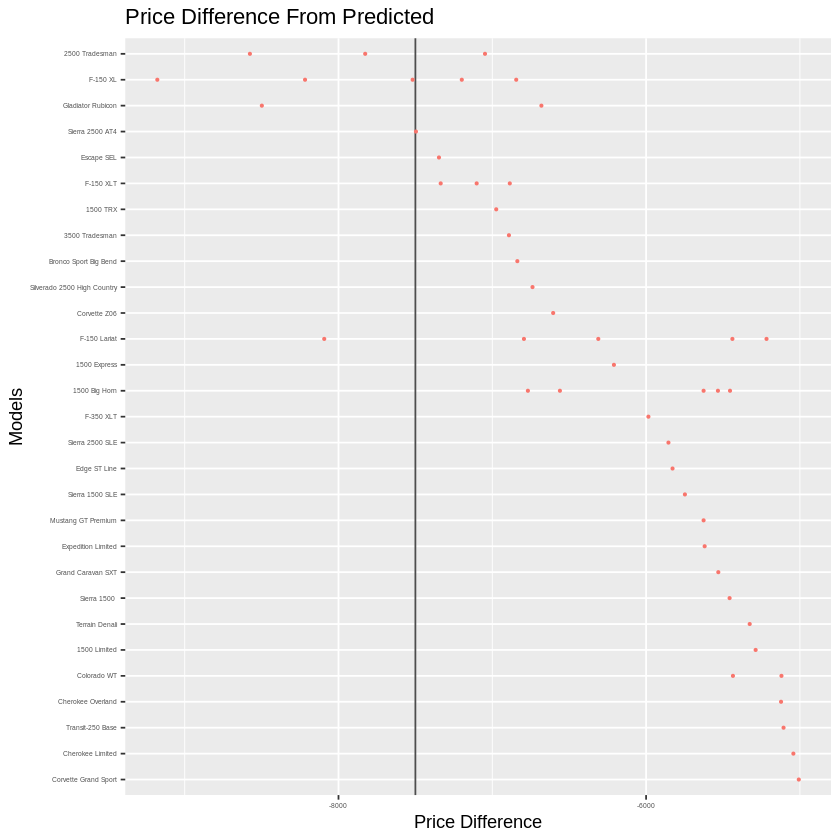

In [17]:
# Breaking out just St. Louis

newp <- ggplot(data = subset(domestic, Diff < -5000 & Diff > -10000 & City == 'St Louis'),
             mapping = aes(x = Diff,
                           y = reorder(Model, -Diff),
                          color = 'blue'))

#Making a vertical line to represent -7.5k or the midpoint of the data
newp1 <- newp + geom_vline(xintercept = -7500, color = "gray30") +
    geom_point(size = .5)

#Making pricing breaks
newp2 <- newp1 + scale_x_continuous(breaks = c(-10000,-8000,-6000,-4000),
                              labels = c('-10000','-8000','-6000','-4000'))
#Labels & aesthetics
newp2 + 
    guides(color=FALSE) + labs(x = "Price Difference", y = "Models") +
    theme(axis.text=element_text(size=4))+   labs(title = "Price Difference From Predicted") 

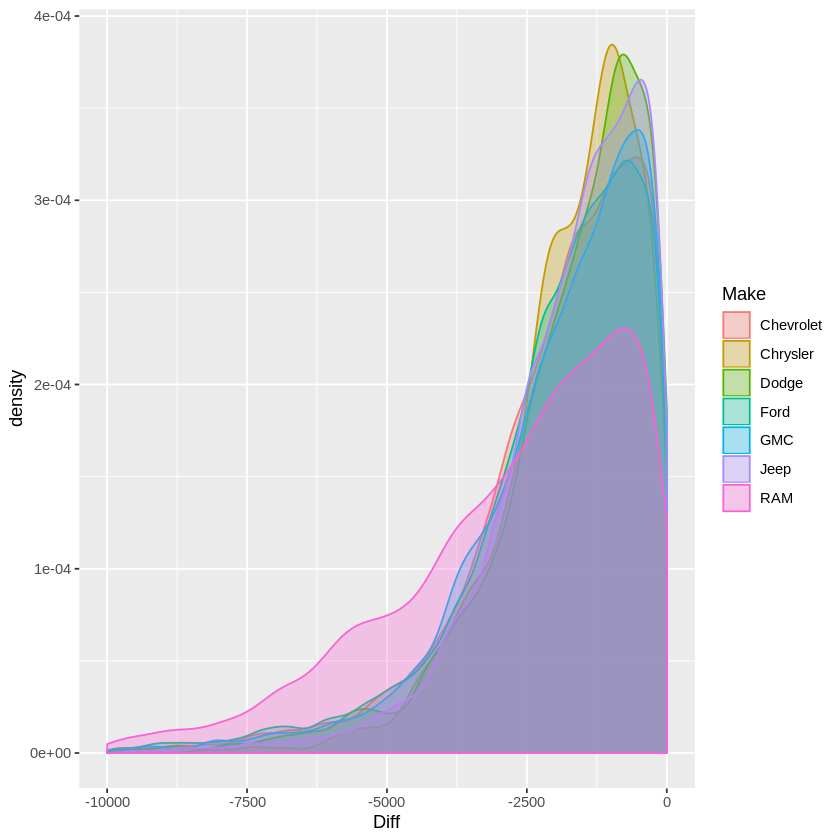

In [18]:
# Density plot of price difference by Make - for Domestics

p <- ggplot(data = subset(domestic, Diff < -0 & Diff > -10000),
             mapping = aes(x = Diff, fill = Make, color = Make))
p + geom_density(alpha = 0.3)

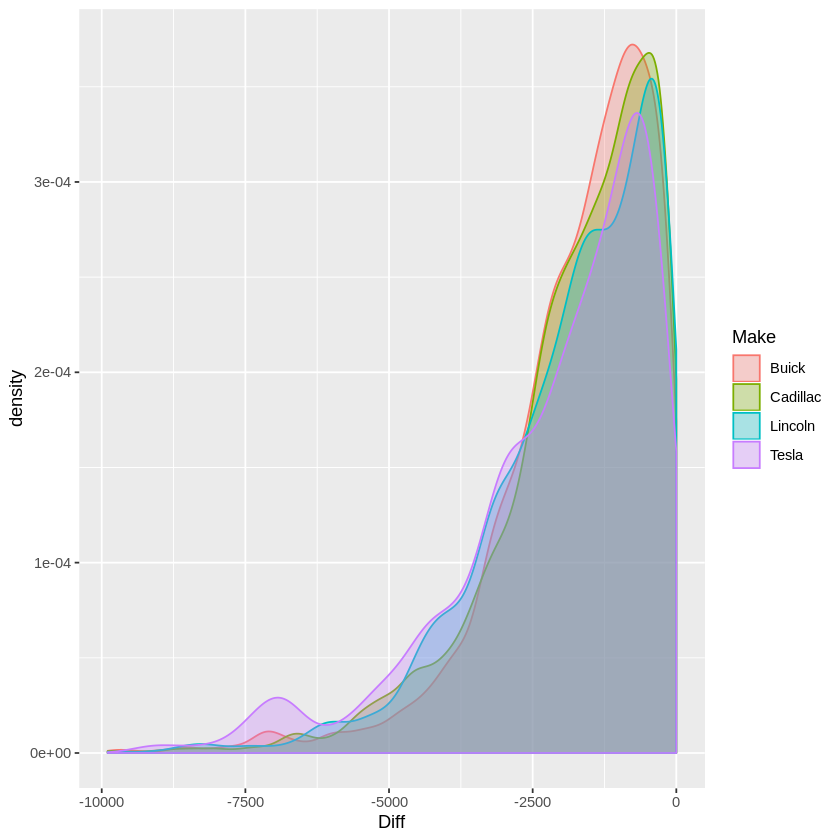

In [19]:
# Density plot of price difference by Make - for Domestic Luxury

p <- ggplot(data = subset(domestic_lux, Diff < -0 & Diff > -10000),
             mapping = aes(x = Diff, fill = Make, color = Make))
p + geom_density(alpha = 0.3)

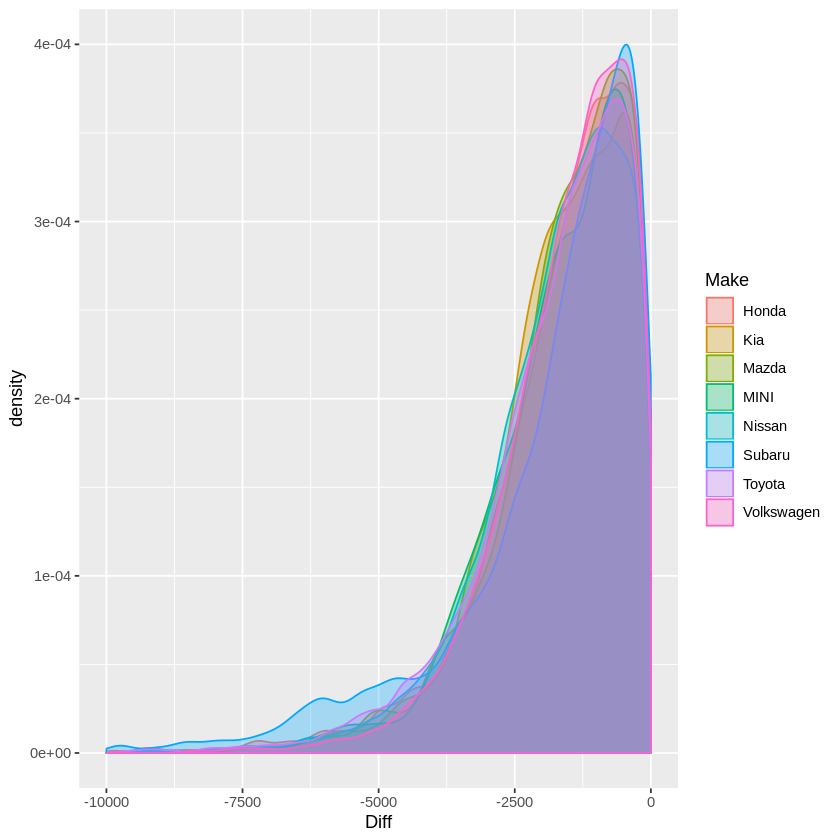

In [20]:
# Density plot of price difference by Make - for foreign

p <- ggplot(data = subset(foreign, Diff < -0 & Diff > -10000),
             mapping = aes(x = Diff, fill = Make, color = Make))
p + geom_density(alpha = 0.3)

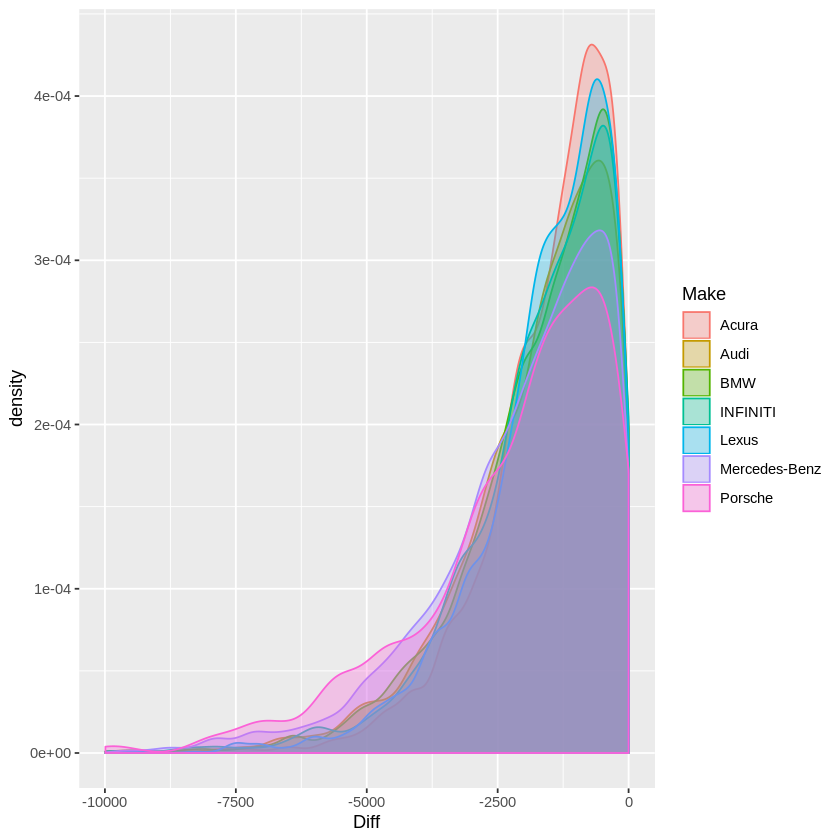

In [21]:
# Density plot of price difference by Make - for foreign luxury

p <- ggplot(data = subset(foreign_lux, Diff < -0 & Diff > -10000),
             mapping = aes(x = Diff, fill = Make, color = Make))
p + geom_density(alpha = 0.3)

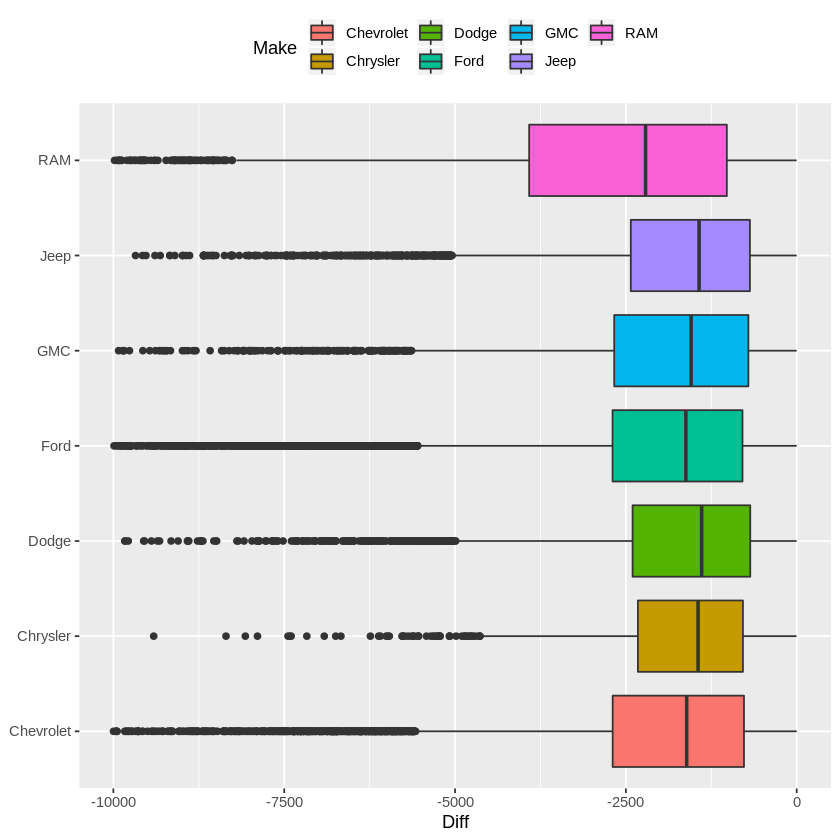

In [22]:
# Box Plot for domestic price difference from predicted

p <- ggplot(data = subset(domestic, Diff < -0 & Diff > -10000),
            mapping = aes(x = Make, y = Diff, fill = Make))
p + geom_boxplot() + labs(x=NULL) +
    coord_flip() + theme(legend.position = "top")

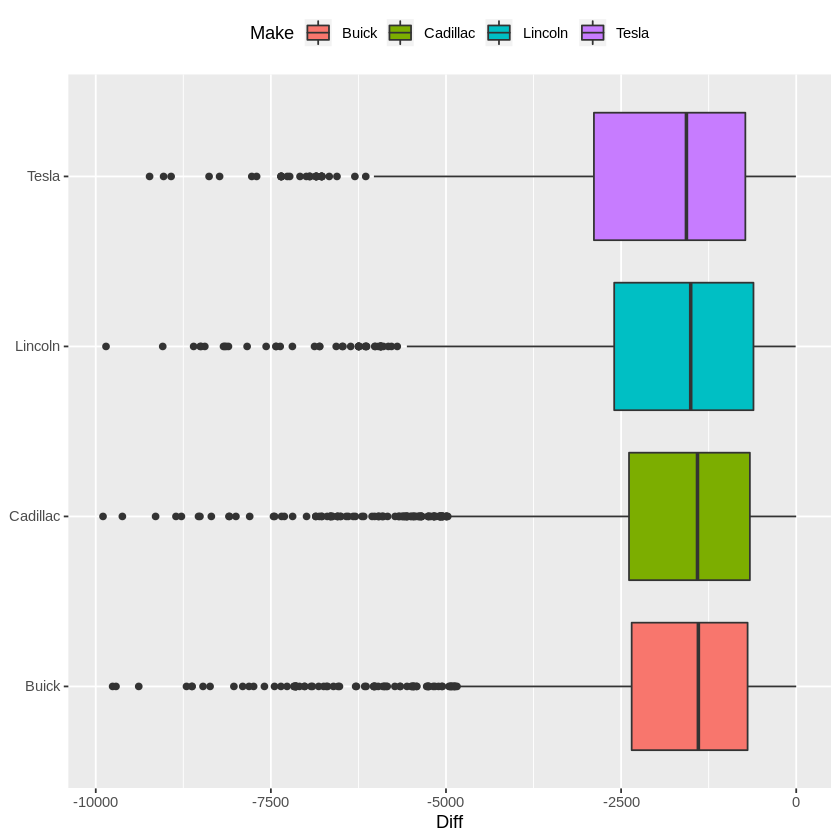

In [23]:
# Box Plot for domestic luxury price difference from predicted

p <- ggplot(data = subset(domestic_lux, Diff < -0 & Diff > -10000),
            mapping = aes(x = Make, y = Diff, fill = Make))
p + geom_boxplot() + labs(x=NULL) +
    coord_flip() + theme(legend.position = "top")

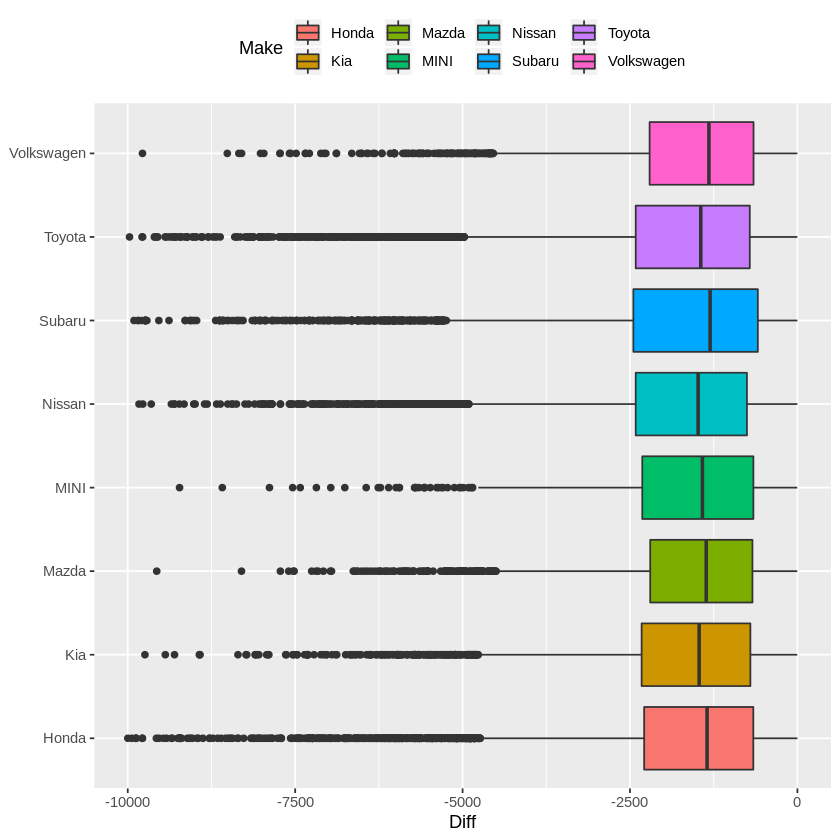

In [24]:
# Box Plot for foreign price difference from predicted

p <- ggplot(data = subset(foreign, Diff < -0 & Diff > -10000),
            mapping = aes(x = Make, y = Diff, fill = Make))
p + geom_boxplot() + labs(x=NULL) +
    coord_flip() + theme(legend.position = "top")

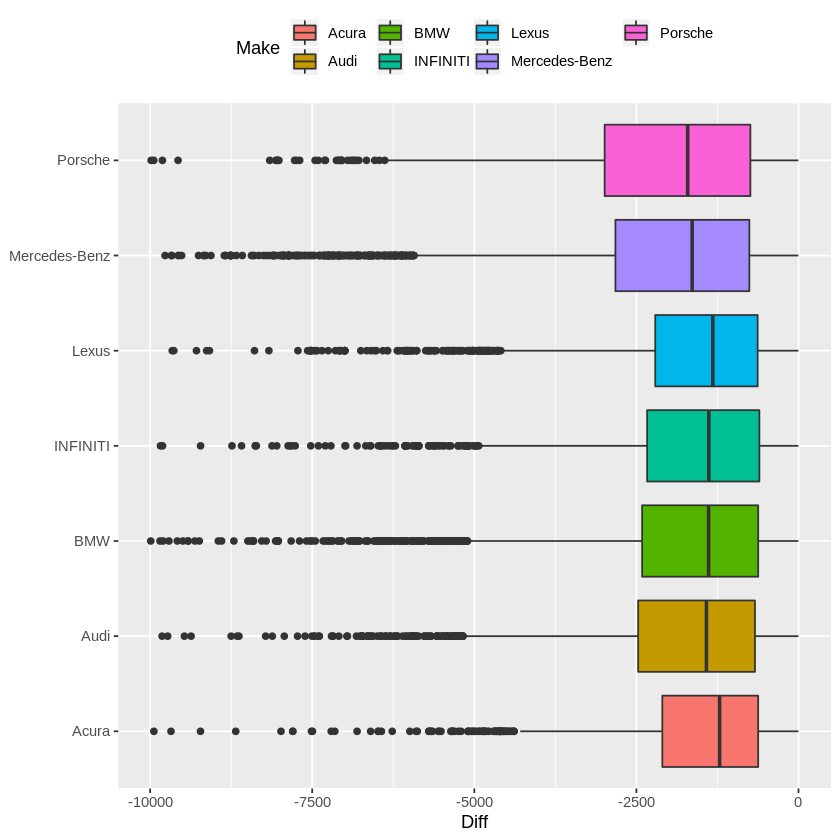

In [25]:
# Box Plot for foreign luxury price difference from predicted

p <- ggplot(data = subset(foreign_lux, Diff < -0 & Diff > -10000),
            mapping = aes(x = Make, y = Diff, fill = Make))
p + geom_boxplot() + labs(x=NULL) +
    coord_flip() + theme(legend.position = "top")